In [1]:
import pandas as pd

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/titanic.csv'

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configuración para mostrar todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

# Configuración para mostrar todas las filas (si es necesario)
pd.set_option('display.max_rows', None)

df = pd.read_csv(url)

# Ver las primeras filas del dataset
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
# Cargar el archivo CSV
important_features_df = pd.read_csv('C:/Users/Diego/Desktop/ML/features/titanic/important_features.csv')

# Crear una lista de columnas a seleccionar (importantes + 'Survived')
selected_columns = important_features_df['Feature'].tolist()  # Asegúrate de que el nombre de la columna sea correcto
selected_columns.append('Survived')  # Agregar 'Survived'

df = df[selected_columns]

In [3]:
# Rellenar valores nulos
if 'Age' in selected_columns:
    df['Age'].fillna(df['Age'].mean(), inplace=True)

# Convertir variables categóricas a variables numéricas
if 'Sex' in selected_columns:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
elif 'Embarked' in selected_columns:
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Verificar si hay valores nulos
print(df.isnull().sum())

Pclass      0
Sex         0
Fare        0
Age         0
Survived    0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras (X) y objetivo (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (664, 4)
Tamaño del conjunto de prueba: (167, 4)


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entrenar el modelo
tree_model = DecisionTreeClassifier(random_state=42,max_depth=4)
tree_model.fit(X_train, y_train)

# Predecir
y_pred_tree = tree_model.predict(X_test)

# Evaluar precisión
print("Precisión del Árbol de Decisión:", accuracy_score(y_test, y_pred_tree))


Precisión del Árbol de Decisión: 0.7964071856287425


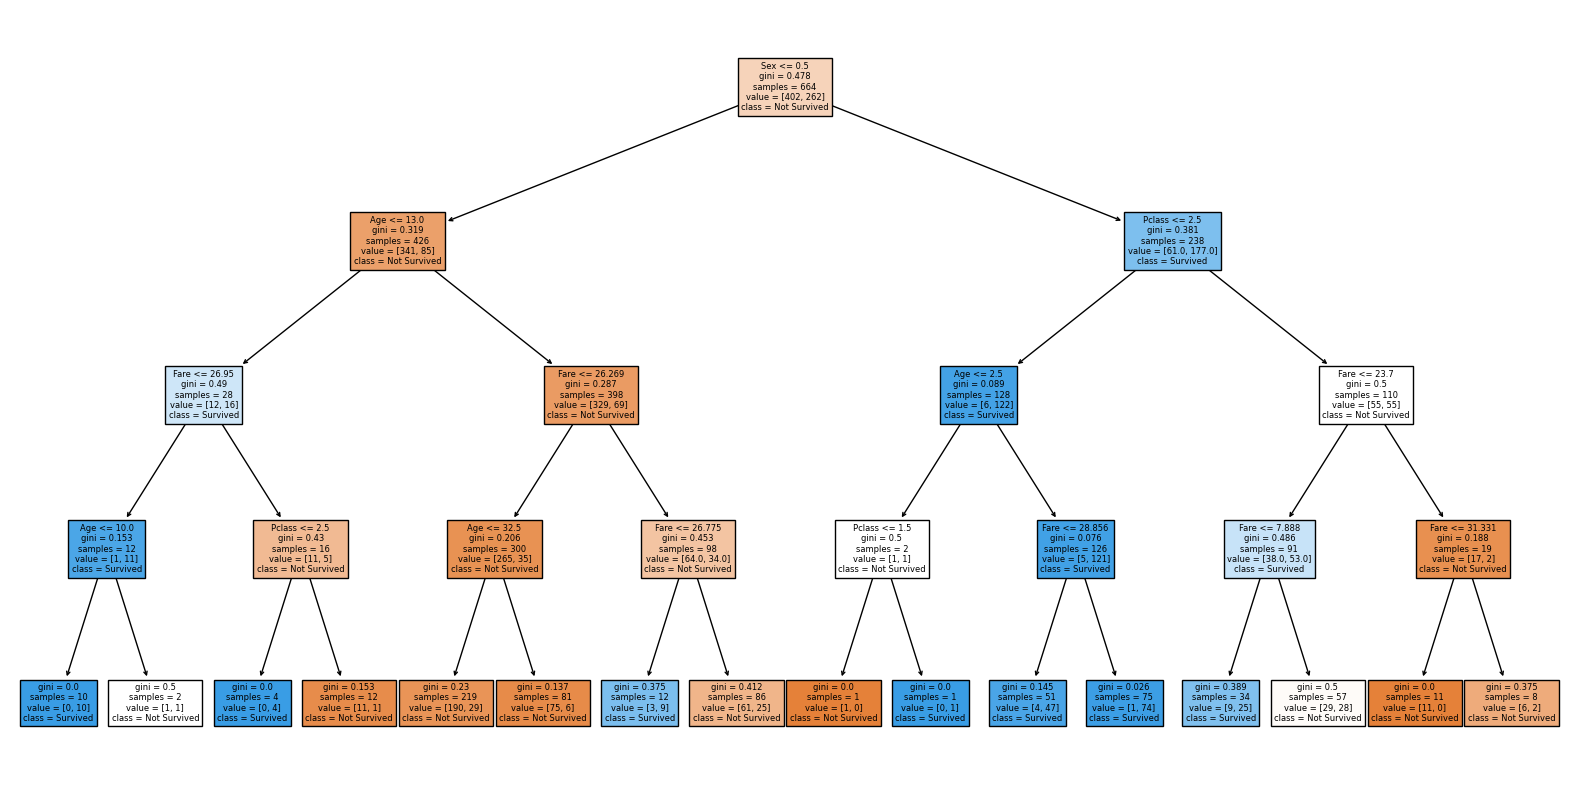

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Suponiendo que estas son las características del dataset Titanic
feature_names = X_train.columns  # Nombres de las características
class_names = ['Not Survived', 'Survived']  # Etiquetas para las clases

# Graficar el árbol de decisión
plt.figure(figsize=(20,10))  # Ajusta el tamaño de la figura
plot_tree(tree_model, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [7]:
import pandas as pd

# Cargar el archivo de prueba
test_data = pd.read_csv('C:/Users/Diego/Desktop/ML/data/test/test_titanic.csv')

# Preprocesar los datos de prueba (realiza el mismo preprocesamiento que con X_train)
# Ejemplo de preprocesamiento (esto depende de cómo preprocesaste X_train)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})  # Convertir Sex a valores numéricos
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

test_data.fillna(0, inplace=True)  # Llenar valores nulos con 0 o alguna estrategia que usaste

# Asegúrate de que las columnas sean las mismas que en X_train
X_test_data = test_data[feature_names]  # Seleccionar las columnas adecuadas

# Predecir la supervivencia con el modelo entrenado
y_pred_test = tree_model.predict(X_test_data)

# Agregar las predicciones al dataframe de prueba para verlo de manera clara
test_data['Survived_Prediction'] = y_pred_test

# Mostrar los primeros resultados
print(test_data[['PassengerId','Survived','Survived_Prediction']])


    PassengerId  Survived  Survived_Prediction
0           832         1                    1
1           833         0                    1
2           834         0                    0
3           835         0                    0
4           836         1                    1
5           837         0                    0
6           838         0                    1
7           839         1                    0
8           840         1                    1
9           841         0                    0
10          842         0                    0
11          843         1                    1
12          844         0                    0
13          845         0                    0
14          846         0                    0
15          847         0                    0
16          848         0                    0
17          849         0                    0
18          850         1                    0
19          851         0                    0
20          8

In [8]:
# Calcular la precisión si 'Survived' está presente en los datos de prueba
if 'Survived' in test_data.columns:
    accuracy = accuracy_score(test_data['Survived'], test_data['Survived_Prediction'])
    print(f"Tasa de acierto (accuracy): {accuracy * 100:.2f}%")
else:
    print("La columna 'Survived' no está presente en los datos de prueba. No se puede calcular el accuracy.")

Tasa de acierto (accuracy): 81.67%


In [10]:
import joblib

# Verifica si la tasa de acierto es mayor que 0.75
if accuracy > 0.75:
    # Guardar el modelo entrenado
    joblib.dump(tree_model, 'C:/Users/Diego/Desktop/ML/models/titanic/tree_titanic.pkl')
    print(f"Modelo guardado exitosamente con una tasa de acierto de {accuracy * 100:.2f}%")
else:
    print(f"Tasa de acierto (accuracy): {accuracy * 100:.2f}%. Modelo no guardado.")

Modelo guardado exitosamente con una tasa de acierto de 81.67%
